In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

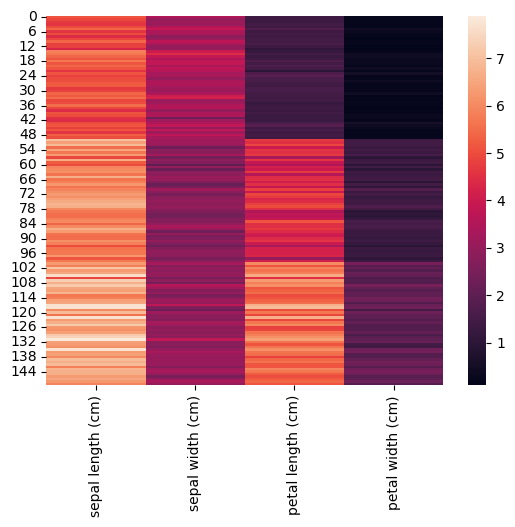

In [46]:
# Get the data
iris_data = load_iris(return_X_y=True, as_frame=True)
iris = iris_data[0]
iris_frame = pd.DataFrame(iris)
iris_frame = sb.heatmap(data=iris_frame)

In [47]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris.columns = features
iris['type'] = iris_data[1]

In [48]:
# Split the data
PRECENTAGE_SAMPLES_TEST = 0.5
train, test = train_test_split(iris, test_size = PRECENTAGE_SAMPLES_TEST)
print(f"Samples for training:{len(train)}. Samples for testing:{len(test)}")

Samples for training:75. Samples for testing:75


<h1>KNN<h1>

In [49]:
classifier = KNeighborsClassifier(metric='minkowski',
                                  p=2,
                                  weights="uniform",
                                  n_neighbors=10) # How many neighbors we are considering to predict the test sample

In [50]:
# Fit the data
classifier.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])

KNeighborsClassifier(n_neighbors=10)

In [51]:
# Predictions
pred = classifier.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print('The classifier\'s predictions over the testing data are:\n',list(pred))
print('And the real testing data we were expecting is:\n',list(test['type']))

# Analyse the predictions with the test data
right = 0
for real, predic in zip(test['type'], pred):  # With ZIP we join two arrays together, element by element, like a zip
    if real == predic:
        right += 1
print('Correctly guessed:', right, '/',len(pred),'(', round(100*right/len(pred), 2), '%)')

The classifier's predictions over the testing data are:
 [2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0]
And the real testing data we were expecting is:
 [2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0]
Correctly guessed: 74 / 75 ( 98.67 %)


In [52]:
def get_accuracy(predictions, real):
    right = 0
    for real, predic in zip(real, predictions):
        if real == predic:
            right += 1
    return round(100*right/len(pred), 2)

accuracies = []

for k in range(1, len(train)):
    knn = KNeighborsClassifier(metric='minkowski', p=2, weights='uniform', n_neighbors=k)
    knn.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
    pred = knn.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    accuracy = get_accuracy(pred, test['type'])
    accuracies.append(accuracy)
    print('K =',k, '\t-  Accuracy:', accuracy, '%')

K = 1 	-  Accuracy: 93.33 %
K = 2 	-  Accuracy: 92.0 %
K = 3 	-  Accuracy: 96.0 %
K = 4 	-  Accuracy: 96.0 %
K = 5 	-  Accuracy: 97.33 %
K = 6 	-  Accuracy: 97.33 %
K = 7 	-  Accuracy: 98.67 %
K = 8 	-  Accuracy: 97.33 %
K = 9 	-  Accuracy: 98.67 %
K = 10 	-  Accuracy: 98.67 %
K = 11 	-  Accuracy: 97.33 %
K = 12 	-  Accuracy: 93.33 %
K = 13 	-  Accuracy: 92.0 %
K = 14 	-  Accuracy: 90.67 %
K = 15 	-  Accuracy: 93.33 %
K = 16 	-  Accuracy: 92.0 %
K = 17 	-  Accuracy: 94.67 %
K = 18 	-  Accuracy: 93.33 %
K = 19 	-  Accuracy: 94.67 %
K = 20 	-  Accuracy: 93.33 %
K = 21 	-  Accuracy: 94.67 %
K = 22 	-  Accuracy: 93.33 %
K = 23 	-  Accuracy: 94.67 %
K = 24 	-  Accuracy: 88.0 %
K = 25 	-  Accuracy: 90.67 %
K = 26 	-  Accuracy: 89.33 %
K = 27 	-  Accuracy: 90.67 %
K = 28 	-  Accuracy: 88.0 %
K = 29 	-  Accuracy: 89.33 %
K = 30 	-  Accuracy: 88.0 %
K = 31 	-  Accuracy: 90.67 %
K = 32 	-  Accuracy: 86.67 %
K = 33 	-  Accuracy: 86.67 %
K = 34 	-  Accuracy: 86.67 %
K = 35 	-  Accuracy: 89.33 %
K 

Now the accuracy does not decrease that much, because far away neighbors do not count much,
even if they are selected in the "K" group


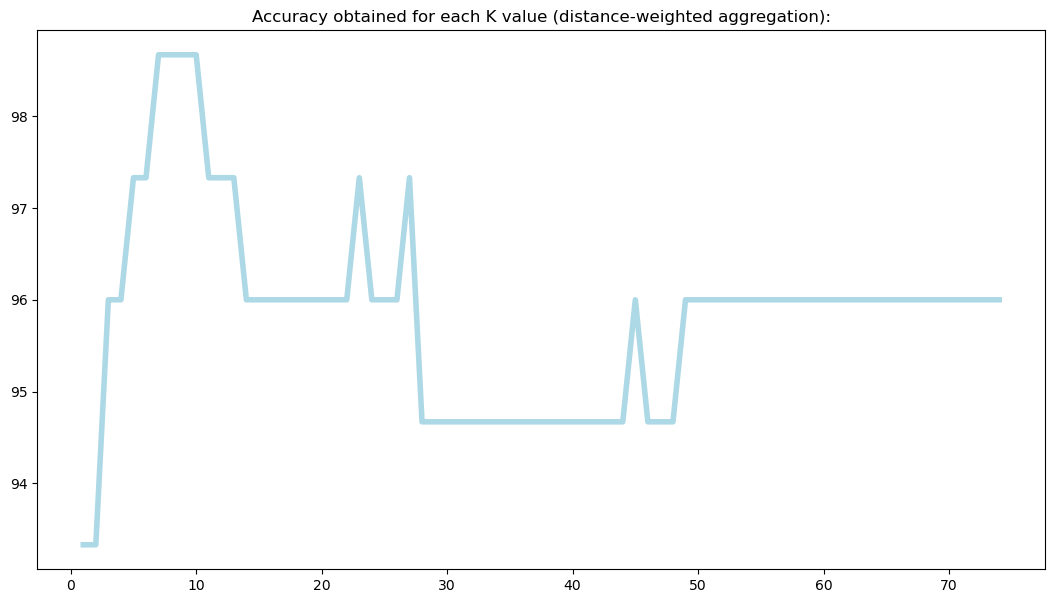

In [53]:
# Now let's change the aggregation function!
# From uniform to distance. That is, from "all of the K selected neighbors count the same" to
# "nearest neighbors are weighted by their distance, the closer ones count more to the aggregated result"
accuracies = []
for k in range(1, len(train)):
    knn_model = KNeighborsClassifier(
        metric='minkowski',
        p=2,
        weights='distance', 
        n_neighbors=k
    )
    knn_model.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])
    preds = knn_model.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    accuracy = get_accuracy(test['type'], preds)
    accuracies.append(accuracy)

plt.figure(figsize=(13, 7))
plt.title('Accuracy obtained for each K value (distance-weighted aggregation):')
plt.plot(range(1, len(train)), accuracies, color='lightblue', linewidth=4)
print('Now the accuracy does not decrease that much, because far away neighbors do not count much,\neven if they are selected in the "K" group')